## ML MODEL TO PREDICT AUDIENCE RATING WITH THE GIVEN DATASET

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import math

Loading the Data

In [108]:
data = pd.read_excel("dataset.xls")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

Performing Exploratory Data Analysis

In [109]:
data.info()
data.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

critics_consensus     8329
writers               1349
in_theaters_date       815
studio_name            416
cast                   284
audience_rating        252
runtime_in_minutes     155
directors              114
movie_info              24
genre                   17
on_streaming_date        2
movie_title              0
rating                   0
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
dtype: int64

In [110]:
data.shape

(16638, 16)

In [111]:
data.dropna(inplace=True, axis=0)
data.isnull().sum().sort_values(ascending=False)

movie_title           0
movie_info            0
critics_consensus     0
rating                0
genre                 0
directors             0
writers               0
cast                  0
in_theaters_date      0
on_streaming_date     0
runtime_in_minutes    0
studio_name           0
tomatometer_status    0
tomatometer_rating    0
tomatometer_count     0
audience_rating       0
dtype: int64

Number of directors in each movie

In [112]:

data['num_directors'] = data['directors'].apply(lambda x : len(x.split(',')))
data[data["num_directors"] == data["num_directors"].max()]

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,num_directors
10976,Paris Je T'aime,Twenty acclaimed filmmakers from around the wo...,"Paris Je T'aime is uneven, but there are more ...",R,"Art House & International, Drama, Romance","Christoffer Boe, Olivier Assayas, Fr√©d√©ric A...","Bruno Podalyd√®s, Paul Mayeda Berges, Gurinder...","Juliette Binoche, Steve Buscemi, Sergio Castel...",2007-05-04,2007-11-13,120.0,First Look Pictures,Certified Fresh,87,112,84.0,22


Number of authors in each movie

In [113]:

data['num_writers'] = data['writers'].apply(lambda x : len(x.split(',')))
data[data["num_writers"] == data["num_writers"].max()]


,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,num_directors,num_writers
10976,Paris Je T'aime,Twenty acclaimed filmmakers from around the wo...,"Paris Je T'aime is uneven, but there are more ...",R,"Art House & International, Drama, Romance","Christoffer Boe, Olivier Assayas, Fr√©d√©ric A...","Bruno Podalyd√®s, Paul Mayeda Berges, Gurinder...","Juliette Binoche, Steve Buscemi, Sergio Castel...",2007-05-04,2007-11-13,120.0,First Look Pictures,Certified Fresh,87,112,84.0,22,24


Number of actors in each movie

In [ ]:

data['num_cast'] = data['cast'].apply(lambda x : len(x.split(',')))
data[data["num_cast"] == data["num_cast"].max()]

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,num_directors,num_writers,num_cast
912,Malcolm X,Writer-director Spike Lee's epic portrayal of ...,Anchored by a powerful performance from Denzel...,PG-13,Drama,Spike Lee,"Spike Lee, Arnold Perl","Denzel Washington, Angela Bassett, Al Freeman ...",1992-11-18,2000-01-18,201.0,Warner Bros.,Certified Fresh,88,57,91.0,1,2,306


Define a mapping for known valid ratings -  ['G', 'PG', 'PG-13', 'R', 'NC17', 'NR']

Invalid Ratings Found: []
rating
R        3423
PG-13    1973
PG       1029
NR        903
G         261
NC17       21
Name: count, dtype: int64


Text(0.5, 1.0, 'Content Ratings Counts')

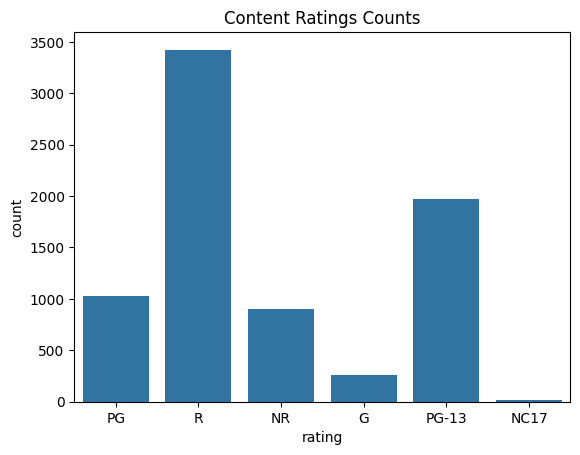

In [ ]:

valid_ratings = ['G', 'PG', 'PG-13', 'R', 'NC17', 'NR']
data['rating'] = data['rating'].str.strip(' )').replace({'PG-13)': 'PG-13', 'R)': 'R'})
invalid_ratings = data[~data['rating'].isin(valid_ratings)]['rating'].unique()

print(data['rating'].value_counts())
sns.countplot(data=data, x='rating')
plt.title('Content Ratings Counts')

Number od Fresh, Certified Fresh and Rotten Movies

tomatometer_status
Rotten             3232
Certified Fresh    2588
Fresh              1790
Name: count, dtype: int64


Text(0.5, 1.0, 'Number od Fresh, Certified Fresh and Rotten Movies')

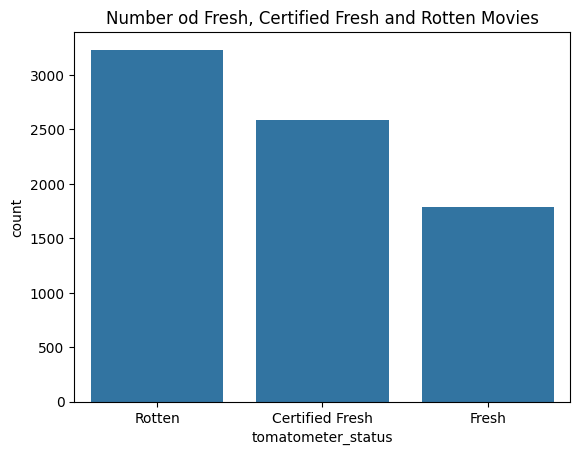

In [ ]:

print(data['tomatometer_status'].value_counts())
sns.countplot(data=data, x='tomatometer_status')
plt.title('Number od Fresh, Certified Fresh and Rotten Movies')

Number of Movies Produced by top 10 Studios

studio_name
Warner Bros. Pictures     404
Universal Pictures        373
20th Century Fox          347
Paramount Pictures        322
IFC Films                 221
Sony Pictures Classics    218
Sony Pictures             157
Magnolia Pictures         150
Columbia Pictures         147
Miramax Films             130
Name: count, dtype: int64


Text(0.5, 1.0, 'Top Studios Counts')

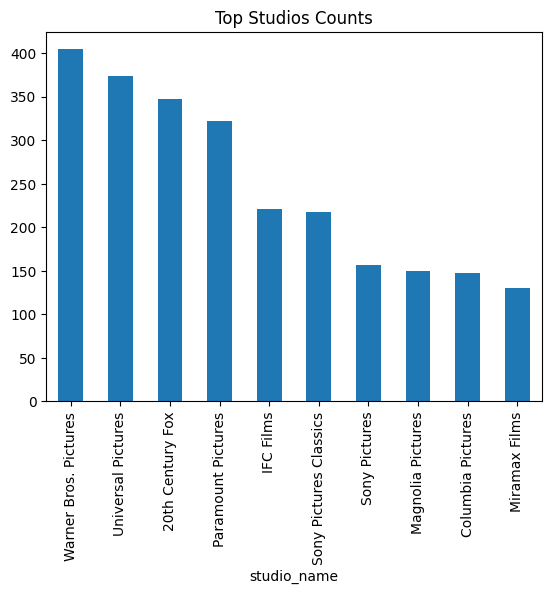

In [ ]:

print(data['studio_name'].value_counts()[:10])
data['studio_name'].value_counts()[:10].plot(kind='bar')
plt.title('Top Studios Counts')

Finding Movies per Year and Highest and Lowest Movie counts

Year with most number of movies:  2007
Year with least number of movies:  1924


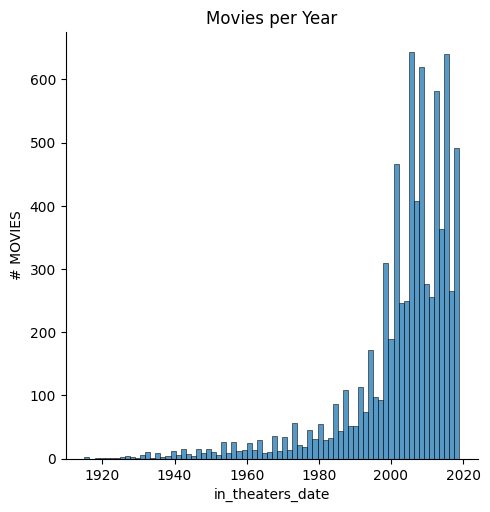

In [ ]:

data['in_theaters_date'] = pd.to_datetime(data['in_theaters_date'])
data['in_theaters_date'] = data['in_theaters_date'].dt.year
sns.displot(data=data, x='in_theaters_date')
plt.ylabel('# MOVIES')
plt.title('Movies per Year')
print('Year with most number of movies: ', data['in_theaters_date'].value_counts().index[0])
print('Year with least number of movies: ', data['in_theaters_date'].value_counts().index[-1])

### Performing Feature Engineering

In [119]:
features = ["in_theaters_date","on_streaming_date","studio_name","runtime_in_minutes","directors","genre","tomatometer_status","tomatometer_rating","tomatometer_count","audience_rating",'critics_consensus']
x = data[features]
x.info(),"\n",x.isna().sum().sort_values(ascending =False)

<class 'pandas.core.frame.DataFrame'>
Index: 7610 entries, 0 to 16634
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   in_theaters_date    7610 non-null   int32         
 1   on_streaming_date   7610 non-null   datetime64[ns]
 2   studio_name         7610 non-null   object        
 3   runtime_in_minutes  7610 non-null   float64       
 4   directors           7610 non-null   object        
 5   genre               7610 non-null   object        
 6   tomatometer_status  7610 non-null   object        
 7   tomatometer_rating  7610 non-null   int64         
 8   tomatometer_count   7610 non-null   int64         
 9   audience_rating     7610 non-null   float64       
 10  critics_consensus   7610 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(5)
memory usage: 683.7+ KB


(None,
 '\n',
 in_theaters_date      0
 on_streaming_date     0
 studio_name           0
 runtime_in_minutes    0
 directors             0
 genre                 0
 tomatometer_status    0
 tomatometer_rating    0
 tomatometer_count     0
 audience_rating       0
 critics_consensus     0
 dtype: int64)

In [120]:
X_clean = x.dropna(inplace=False, axis=0)

### Applying NLTK for Sentiment Analysis on Critic Consensus

In [121]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
sid = SentimentIntensityAnalyzer()

Text Cleaning Function

In [122]:

def clean_text(text):
    if pd.isnull(text):
        return ''
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [123]:

X_clean['clean_critics_consensus'] = X_clean['critics_consensus'].apply(clean_text)

Sentiment Analysis

In [ ]:


X_clean['critics_sentiment_score'] = X_clean['clean_critics_consensus'].apply(lambda x: sid.polarity_scores(x)['compound'])
X_clean['critics_sentiment'] = X_clean['critics_sentiment_score'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))


print("Critics Consensus Sentiment Distribution:")
print(X_clean['critics_sentiment'].value_counts())


Critics Consensus Sentiment Distribution:
critics_sentiment
positive    5035
negative    1971
neutral      604
Name: count, dtype: int64


Perform one-hot encoding for sentiments

In [125]:

critics_sentiment_encoded = pd.get_dummies(X_clean['critics_sentiment'], prefix='critics_sentiment')


Create TF-IDF features

In [126]:

vectorizer = TfidfVectorizer(max_features=1000)
tfidf_critics = vectorizer.fit_transform(X_clean['clean_critics_consensus'])
tfidf_critics_df = pd.DataFrame(tfidf_critics.toarray(), columns=vectorizer.get_feature_names_out())


Creating Label Encoding for various features

In [127]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
oe = LabelEncoder()

In [128]:

studio_name = np.array(X_clean['studio_name'].astype(str)).reshape(-1,1)
directors = np.array(X_clean['directors'].astype(str)).reshape(-1,1)
genre = np.array(X_clean['genre'].astype(str)).reshape(-1,1)
tomatometer_status = np.array(X_clean['tomatometer_status'].astype(str)).reshape(-1,1)

In [129]:
X_clean["studio_name"]=oe.fit_transform(studio_name)
X_clean["directors"]=oe.fit_transform(directors)
X_clean["genre"]=oe.fit_transform(genre)
X_clean["tomatometer_status"]=oe.fit_transform(tomatometer_status)

d:\py\.venv\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\py\.venv\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\py\.venv\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\py\.venv\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Creating a Correlation Matrix

<Axes: >

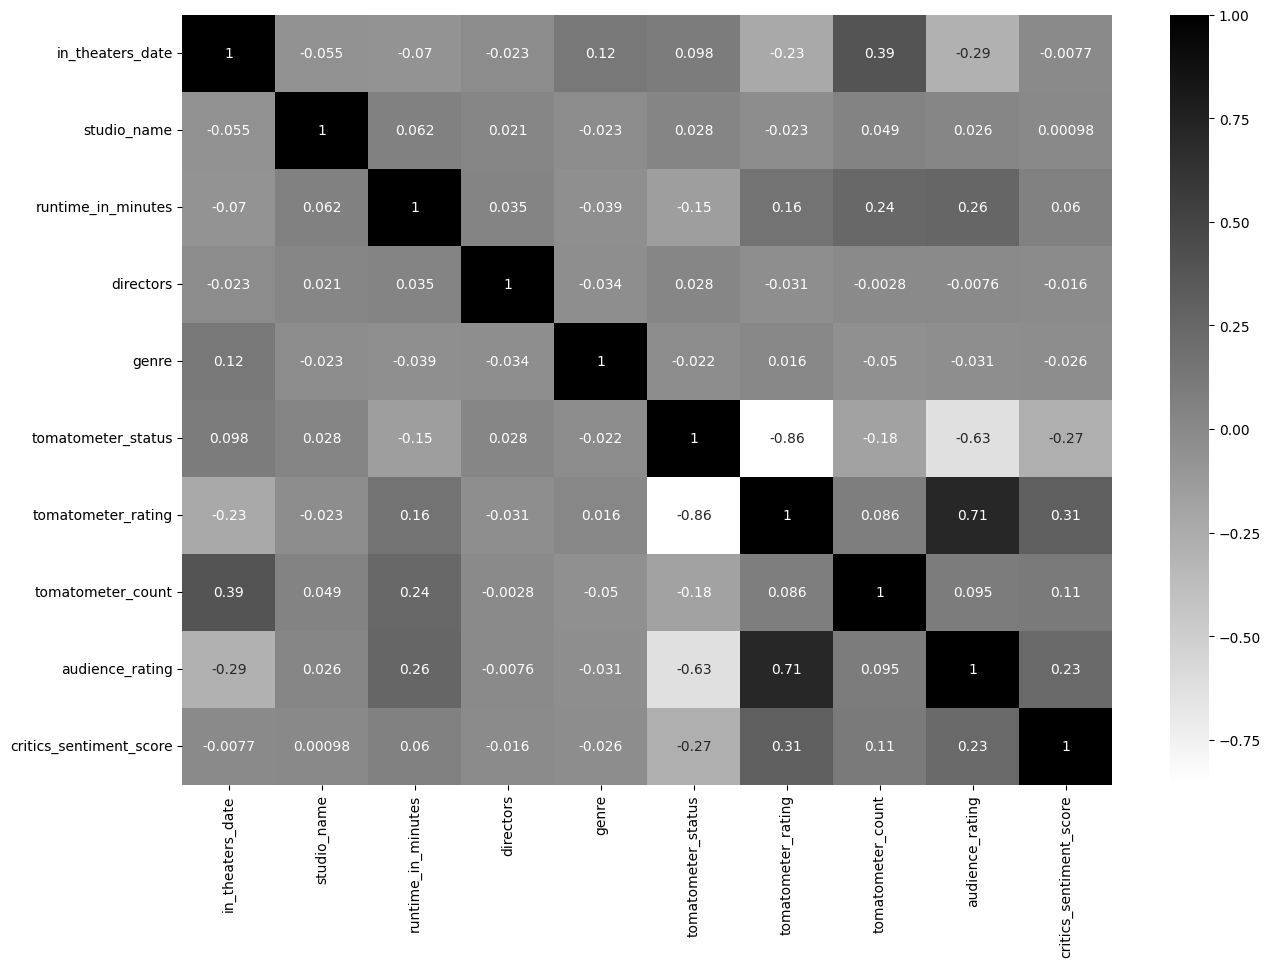

In [130]:

corr = X_clean.select_dtypes('number').corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='binary')

Data Cleaning 

In [131]:
X_clean["no_of_days_in_theaters"] = abs((pd.to_datetime(X_clean["in_theaters_date"]) - pd.to_datetime(X_clean["on_streaming_date"])).dt.days)

In [132]:
X_clean.drop(["in_theaters_date","on_streaming_date"],axis=1,inplace=True)
X_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7610 entries, 0 to 16634
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   studio_name              7610 non-null   int32  
 1   runtime_in_minutes       7610 non-null   float64
 2   directors                7610 non-null   int32  
 3   genre                    7610 non-null   int32  
 4   tomatometer_status       7610 non-null   int32  
 5   tomatometer_rating       7610 non-null   int64  
 6   tomatometer_count        7610 non-null   int64  
 7   audience_rating          7610 non-null   float64
 8   critics_consensus        7610 non-null   object 
 9   clean_critics_consensus  7610 non-null   object 
 10  critics_sentiment_score  7610 non-null   float64
 11  critics_sentiment        7610 non-null   object 
 12  no_of_days_in_theaters   7610 non-null   int64  
dtypes: float64(3), int32(4), int64(3), object(3)
memory usage: 713.4+ KB


Feature Scaling

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_clean["runtime_in_minutes"] = scaler.fit_transform(X_clean[["runtime_in_minutes"]])
X_clean["tomatometer_rating"] = scaler.fit_transform(X_clean[["tomatometer_rating"]])
X_clean["audience_rating"] = scaler.fit_transform(X_clean[["audience_rating"]])
X_clean["no_of_days_in_theaters"] = scaler.fit_transform(X_clean[["no_of_days_in_theaters"]])

In [134]:
columns_to_be_removed = ['audience_rating', 'critics_consensus', 'clean_critics_consensus','critics_sentiment']

In [135]:
Xset = X_clean.drop(columns=columns_to_be_removed,inplace= False, axis = 1)
y = X_clean["audience_rating"]
Xset.columns

Index(['studio_name', 'runtime_in_minutes', 'directors', 'genre',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'critics_sentiment_score', 'no_of_days_in_theaters'],
      dtype='object')

Splitting Data for Training our ML Model

In [136]:
X_train, X_test, y_train, y_test = train_test_split(Xset,y, test_size=0.2, random_state=42)
X_train

,studio_name,runtime_in_minutes,directors,genre,tomatometer_status,tomatometer_rating,tomatometer_count,critics_sentiment_score,no_of_days_in_theaters
3617,759,-0.834408,1595,610,0,1.255139,140,-0.7506,0.985954
11033,881,-0.629896,203,471,2,-2.037608,60,-0.4019,1.144438
7197,881,-0.374256,2838,534,2,-0.445511,87,0.9100,0.985954
10854,778,0.494921,3114,534,2,-0.300774,193,0.3400,0.928046
6297,700,0.085896,1771,143,2,-0.336959,134,-0.2023,-0.379452
...,...,...,...,...,...,...,...,...,...
11526,512,-0.783280,1696,534,0,0.893299,198,0.1779,0.467831
11914,633,0.852817,31,557,2,-0.698799,227,0.4404,0.702510
1829,145,-0.169744,1749,136,2,-1.024455,88,0.6249,-1.004247
16625,984,-0.629896,1526,460,2,-0.807351,64,-0.7410,0.074667


Checking for Skewness in the Data

In [137]:
print(X_clean.skew(numeric_only=True))

studio_name               -0.340452
runtime_in_minutes         1.511760
directors                 -0.081595
genre                     -0.582601
tomatometer_status        -0.164296
tomatometer_rating        -0.460278
tomatometer_count          1.361125
audience_rating           -0.341295
critics_sentiment_score   -0.597634
no_of_days_in_theaters     0.114035
dtype: float64


We can find that there's Skewness in runtime_in_minutes and tomato_meter_count

In [138]:
skewness_check = (X_clean.skew(numeric_only=True) >= 1) | (X_clean.skew(numeric_only=True) <= -1)
skewed_columns = skewness_check[skewness_check == True].index
print(skewed_columns)

Index(['runtime_in_minutes', 'tomatometer_count'], dtype='object')


Data Transformation to reduce Skewness

In [139]:
np.seterr(divide='ignore')
sk_ = pd.DataFrame(np.select([X_clean[skewed_columns] == 0, X_clean[skewed_columns] > 0, X_clean[skewed_columns] < 0], [0, np.log(X_clean[skewed_columns]), np.log(X_clean[skewed_columns])]), columns=skewed_columns).set_index(X_clean.index)
df_skew = X_clean.drop(columns=skewed_columns).set_index(X_clean.index)
data_skew = pd.concat([df_skew, sk_], axis=1)
data_skew = data_skew[X_clean.columns.tolist()]

d:\py\.venv\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [140]:
x_nonskew = X_clean[['studio_name', 'runtime_in_minutes', 'directors', 'genre',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'critics_sentiment_score', 'no_of_days_in_theaters']]

### Training Various ML models

#### 1. RandomForestRegressor

In [141]:
from sklearn.ensemble import RandomForestRegressor
 
forest_model = RandomForestRegressor(random_state=42)
 
forest_model.fit(X_train, y_train)

y_pred_forest = forest_model.predict(X_test)

mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print(f"Random Forest - Mean Squared Error (MSE): {mse_forest:.4f}")
print(f"Random Forest - R-squared (R2): {r2_forest:.4f}")

Random Forest - Mean Squared Error (MSE): 0.4020
Random Forest - R-squared (R2): 0.5963


#### 2. XGBRegressor

In [142]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - Mean Squared Error (MSE): {mse_xgb:.4f}")
print(f"XGBoost - R-squared (R2): {r2_xgb:.4f}")

XGBoost - Mean Squared Error (MSE): 0.4292
XGBoost - R-squared (R2): 0.5690


#### 3. Ridge

In [29]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()

ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression - Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"Ridge Regression - R-squared (R2): {r2_ridge:.4f}")

Ridge Regression - Mean Squared Error (MSE): 0.4696
Ridge Regression - R-squared (R2): 0.5314


#### 4. KNN

In [144]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors - Mean Squared Error (MSE): {mse_knn:.4f}")
print(f"K-Nearest Neighbors - R-squared (R2): {r2_knn:.4f}")

K-Nearest Neighbors - Mean Squared Error (MSE): 1.0609
K-Nearest Neighbors - R-squared (R2): -0.0653


The Best ML model with the Highest Accuracy is Random Forest Regressor 

Performing a residual analysis for validating RandomForestRegressor

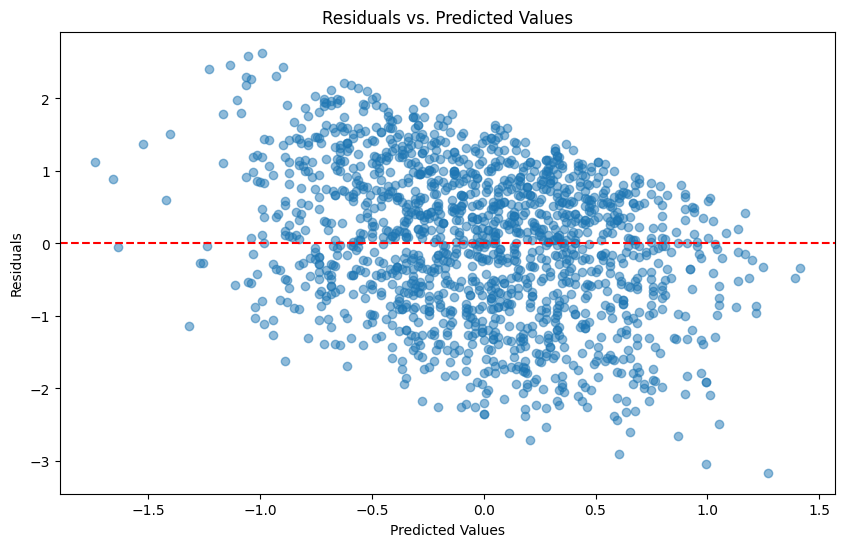

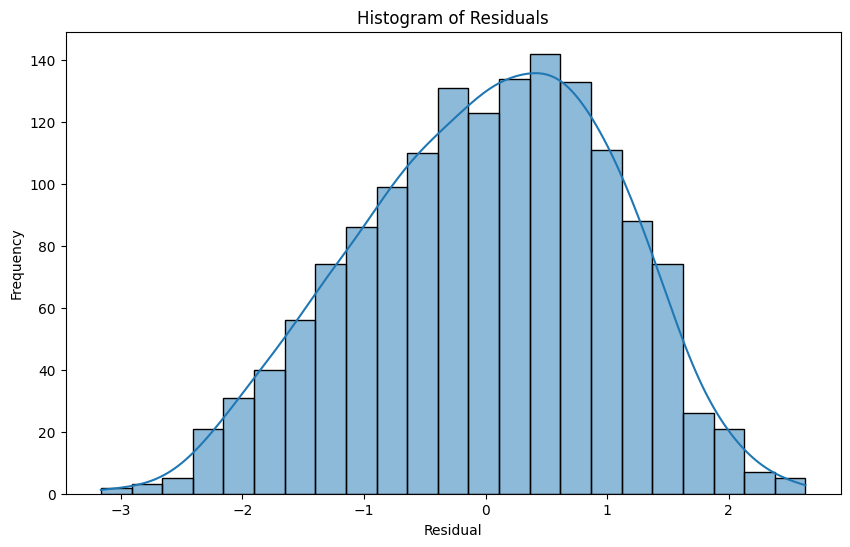

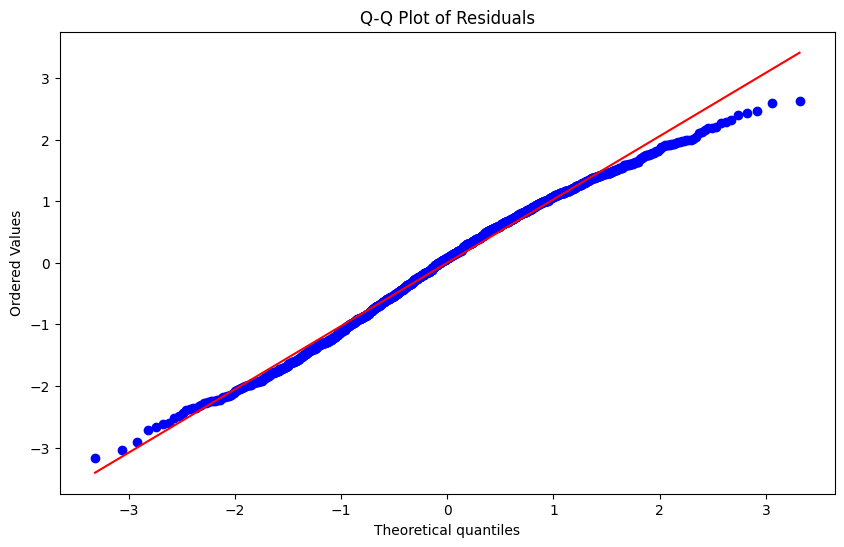

Mean of Residuals: 0.0004
Standard Deviation of Residuals: 1.0300


In [145]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error, r2_score

forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
residuals = y_test - y_pred_knn

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_knn, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot for residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Summary statistics of residuals
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
print(f"Mean of Residuals: {mean_residual:.4f}")
print(f"Standard Deviation of Residuals: {std_residual:.4f}")